# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузка данных и предобработка - загрузите датасет так, чтобы нулевой столбец выступал в качестве индекса датафрейма. Посмотрите на его `head` и `tail`. Похоже, у нас есть одна лишняя переменная - `id`, которая совершенно не информативна и будет нам только мешать, давайте сразу её уберем.
2. [1 балл] Какое среднее число лайков в датасете? А медианное?
3. [1 балл] Какой источник (автор) создал больше всего мемов? 
4. [2 балла] Создайте переменные, отвечающие за месяц, день, час и день недели, в которые мем появлялся. В какой год было создано больше всего мемов? 
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [3 балла] Похоже, что наши созданные переменные не очень хорошо смотреть на одном общем графике. Давайте потсроим отдельные для каждого. Постройте гистограмму для месяца выхода мема, указав число число разбиений равное 12 (по количеству месяцев в году). В какой месяц наплодили максимальное число мемов? Почему? Теперь постройте гистограмму для часа дня, указав логичное число разбиений. Как вы можете объяснить получившийся вид графика?
7. [1 балл] Вопрос-сюрприз! Попробуйте самостоятельно придумать какой-нибудь осмысленный вопрос для вашего датасета и ответьте на  него. Инициатива не наказуема ;)

## Итого - 10 баллов, супер :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import os
os.getcwd()

'C:\\Users\\DELL\\Desktop'

### Комментарий к решению
Отлично, с загрузкой данных справились

In [41]:
data = pd.read_csv('Pilosan_Asat_Hillary.csv', index_col = 0)

In [56]:
# посмотрим на начало таблицы
data.head()

,timestamp,link,caption,author,network,likes,Year,Month,Day,Hour,Weekday
0,2016-08-01 20:56:00,http://imgur.com/a/lNHED,"Son killed by\n country, in a\n in a\n war sta...",forwardsfromgrandma,imgur,-20,2016,8,1,20,<built-in method weekday of Timestamp object a...
1,2016-09-05 13:51:00,http://imgur.com/a/Cm6ls,"TRUMP LOVES TRUMP, AND\n DOES WHAT HIS FOLLOWE...",politicalhumor,imgur,-17,2016,9,5,13,<built-in method weekday of Timestamp object a...
2,2016-07-27 00:54:00,http://imgur.com/a/FRGrq,1h\n Why end racism when we can just\n end the...,TumblrInAction,imgur,-16,2016,7,27,0,<built-in method weekday of Timestamp object a...
3,2016-07-08 04:12:00,http://imgur.com/a/zF2Bw,Do jokes about not noticing someone\n because ...,toosoon,imgur,-16,2016,7,8,4,<built-in method weekday of Timestamp object a...
4,2016-10-20 07:34:00,http://imgur.com/a/giimL,HILLARY CLINTON SAYS YOU CAN\n KILL A BABY THE...,forwardsfromgrandma,imgur,-14,2016,10,20,7,<built-in method weekday of Timestamp object a...


In [55]:
# на конец:
data.tail()

,timestamp,link,caption,author,network,likes,Year,Month,Day,Hour,Weekday
10891,2016-07-29 18:09:00,https://instagram.com/p/BIdHVLJBUks,bill: hey hill check this out\n hillary\n hey ...,11762801,instagram,101480,2016,7,29,18,<built-in method weekday of Timestamp object a...
10892,2016-04-10 20:17:00,https://instagram.com/p/BECGkcSq8jQ,hillary: i hate braids\n black people: we love...,11762801,instagram,102093,2016,4,10,20,<built-in method weekday of Timestamp object a...
10893,2016-10-30 20:10:00,https://instagram.com/p/BMMzJFcD1vW,Katy Perry dressed as Hillary Clinton.\n She h...,1419706373,instagram,127195,2016,10,30,20,<built-in method weekday of Timestamp object a...
10894,2016-09-27 02:45:00,https://instagram.com/p/BK19S3KDYgU,when u laughing at hillary and donald\n debati...,1419706373,instagram,154988,2016,9,27,2,<built-in method weekday of Timestamp object a...
10895,2016-09-19 02:15:00,https://instagram.com/p/BKhTfWbghFL,"Hilary Clinton Says ""Let's Make It Happen""\n W...",1419706373,instagram,231028,2016,9,19,2,<built-in method weekday of Timestamp object a...


## Datetime features

### Комментарий к решению
С weekday немного стоило посмотреть, что выходит - это на самом деле функция, поэтому нужно в конце писать круглые скобки, чтобы действительно вернулся день недели :) 

```python
data['Weekday'] = data.timestamp.apply(lambda x: x.weekday())
```

In [54]:
# переводим таймстэмпы в формат datetime, чтобы с ними было удобнее работать в дальнейшем
data['timestamp'] = data.timestamp.apply(lambda x: pd.to_datetime(x))

# создаем переменную "год", в который вышел мемчик
data['Year'] = data.timestamp.apply(lambda x: x.year)

# аналогично создайте переменные Month, Day, Hour, Weekday
data['Month'] = data.timestamp.apply(lambda x: x.month)
data['Day'] = data.timestamp.apply(lambda x: x.day)
data['Hour'] = data.timestamp.apply(lambda x: x.hour)
data['Weekday'] = data.timestamp.apply(lambda x: x.weekday)

In [44]:
# выкидываем лишнюю переменную
data = data.drop(['id'], axis=1)

### Комментарий к решению
Всё верно

In [10]:
# медианное число лайков
data.likes.median()

38.0

In [11]:
# среднее число лайков
data.likes.mean()

864.2482562408223

In [17]:
# максимальное количество лайков
data.likes.max()

231028

In [18]:
# топ авторов, создавших наибольшее количество мемчиков
data['author'].value_counts()

forwardsfromgrandma     259
6.63702E+14             243
politicalhumor          212
AdviceAnimals           165
funny                   148
7.91374E+14             139
4chan                   128
me_irl                   94
1.64687E+15              87
2.35087E+14              87
3.34749E+14              86
1.92264E+15              80
1.4538E+14               78
2.97176E+14              75
Thathappened             71
3.46787E+14              69
facepalm                 67
1.88355E+11              66
conservativecartoons     66
3.07189E+14              65
iamverysmart             61
2.46977E+14              56
2.4852E+14               55
3.40862E+14              54
3.52587E+14              54
1539151608               52
1.12884E+14              51
1.65978E+15              51
2.17926E+14              48
5.41886E+14              47
                       ... 
1.50747E+15               1
1.90558E+11               1
7.42233E+14               1
3.73855E+14               1
allthingsmlg        

In [21]:
# максимальное число мемов, созданных одним троллем
data.author.value_counts().max()

259

In [28]:
# число мемов, созданных за определенный год
data.Year.value_counts()

2016    10717
2015      169
2014        8
2013        2
Name: Year, dtype: int64

### Комментарий к решению
И снова верно

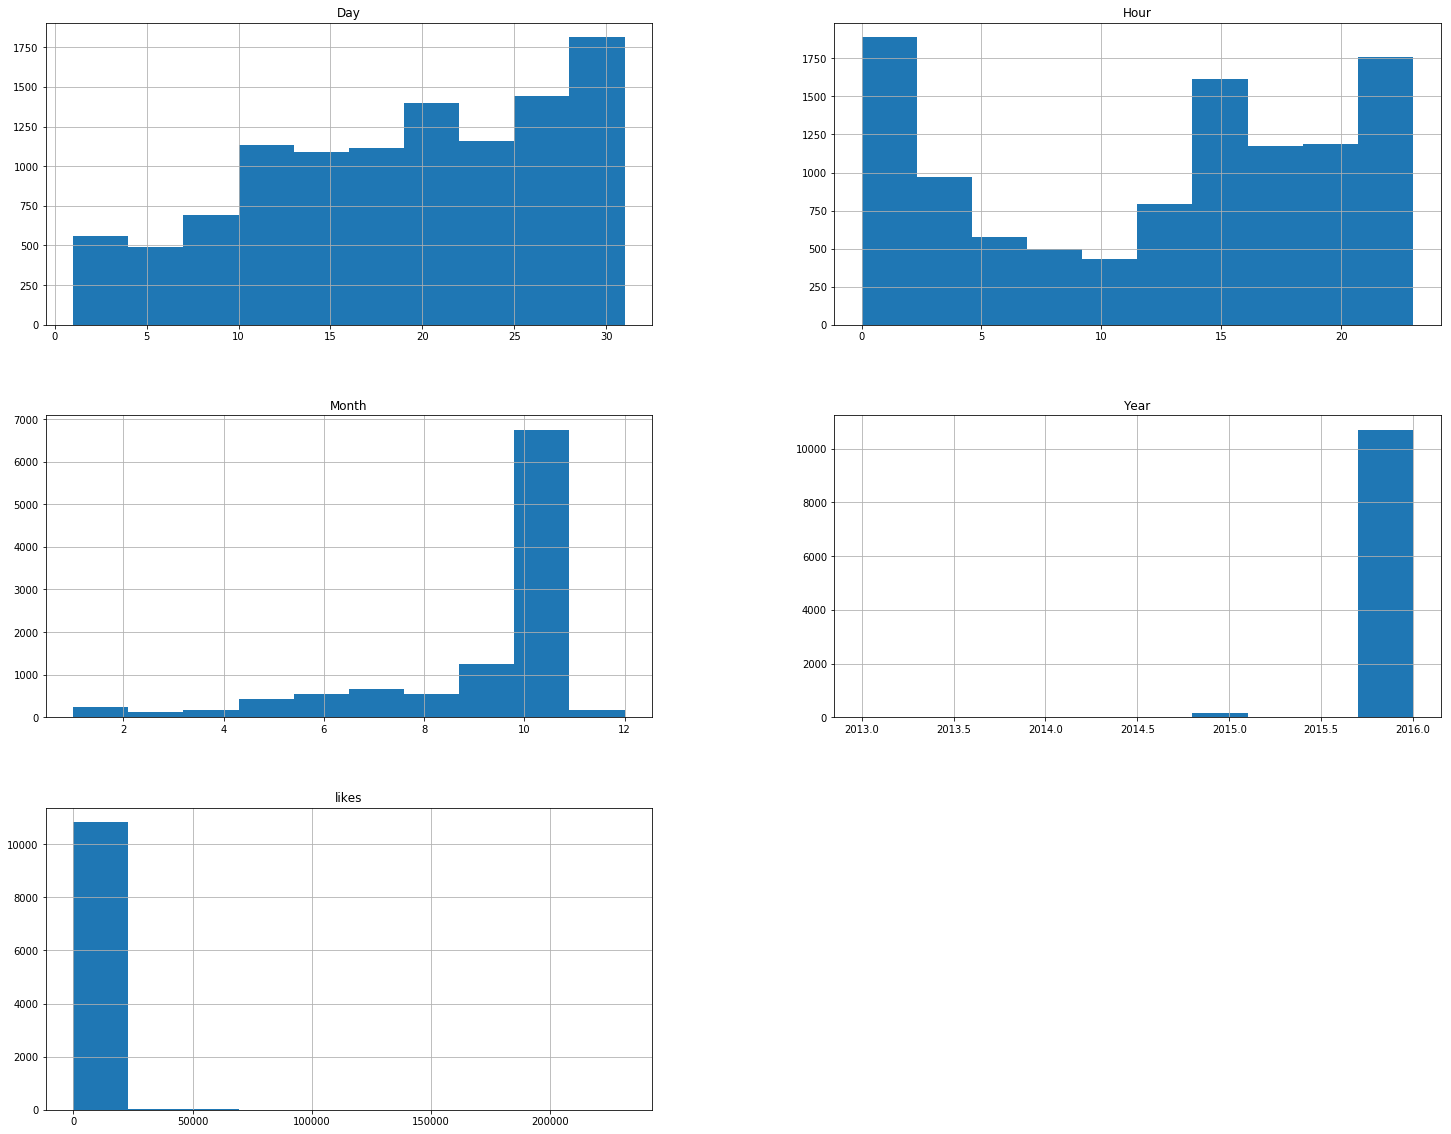

In [29]:
# гистограммы, показывающие в какой час, день, месяц и год было созданно определенное количество мемов
data.hist(figsize=(25, 20));

### Комментарий к решению
Шикарно ;) 

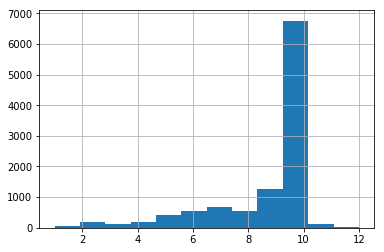

In [33]:
# гистограмма показывает, что, чем ближе президентские выборы, тем больше мемчиков гуляет по сети
data['Month'].hist(bins=12)

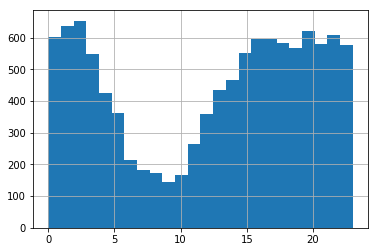

In [38]:
# а тут мы видим, что мемы просматриваются в основном с 2 часов дня до 2 часов ночи
data['Hour'].hist(bins=24)

### Комментарий к решению
Круто :)

In [51]:
#на какой платформе набралось больше всего лайков и сколько 

a = data.groupby('network').likes.sum().facebook
b = data.groupby('network').likes.sum().imgur
c = data.groupby('network').likes.sum().twitter
d = data.groupby('network').likes.sum().instagram

if a>d & a>b & a>c  :
    print ('В Instagram набралось больше всего лайков, а именно  ', data.groupby('network').likes.sum().max())
elif b>c & b>a & b>d:
    print ('В Imgur набралось больше всего лайков, а именно  ', data.groupby('network').likes.sum().max())
elif c>a & c>b & c>d:
    print ('В Twitter набралось больше всего лайков, а именно  ', data.groupby('network').likes.sum().max())
elif d>a & d>c & d>b:
    print ('В Facebook набралось больше всего лайков, а именно  ', data.groupby('network').likes.sum().max())

В Facebook набралось больше всего лайков, а именно   4867389
